In [246]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,  roc_curve, auc

In [132]:
# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

In [144]:
# drop profile whose age/gender/income is missing 
profile = profile.dropna()

In [145]:
#get the offer count
transcript['id']= transcript['value'].apply(lambda x : x.values()).apply(lambda x : str(x)[14:46])

In [146]:
# merge transcript and portfolio
data_set1 = pd.merge(transcript,portfolio , how='left',on=['id'])
# rename the columns person
profile= profile.rename(columns={'id':'person'})

In [149]:
# merge data_set1 with profile 
df = pd.merge(profile, data_set1,how='left',on=['person'])
df = df.drop(columns=['value'],axis=1)

,age,became_member_on,gender,person,income,event,time,id,channels,difficulty,duration,offer_type,reward
0,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,transaction,18,1.51]),NaN,NaN,NaN,NaN,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,transaction,144,2.28]),NaN,NaN,NaN,NaN,NaN
2,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5.0,7.0,bogo,5.0
3,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,offer received,504,3f207df678b143eea3cee63160fa8bed,"[web, email, mobile]",0.0,4.0,informational,0.0
4,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,transaction,528,3.22]),NaN,NaN,NaN,NaN,NaN


In [230]:
# create an empty list 
offer_list=[]

In [234]:
# a fuciton to calcualte transaction ratio/ completion ratio/ view ratio

for i in range(len(person_list)): 
    new = df[df['person']==person_list[i]].groupby('event')['id'].count()/len(df[df['person']==person_list[i]])
    person = person_list[i]
    if  'transaction' in new:   
        transaction_ratio = new['transaction']
    else: 
        transaction_ratio = 0
    if 'offer viewed' in new: 
        view = new['offer viewed']/new['offer received']
    else: 
        view = 0
    
    if 'offer completed'in new:
        completion = new['offer completed']/new['offer received']  
    else: 
        completion = 0
    col = [person, transaction_ratio,view,completion]  
    offer_list.append(col)
        

In [8]:
# since the funciton above takes some time to run, I saved the dataset as a csv file 
offer_list = pd.read_csv('offer_list.csv')

In [101]:
#transfer offer_list to a data frame and rename the columns
offer_list = pd.DataFrame(offer_list, columns=['person','transaction_ratio','view_ratio','completion_ratio'])
offer_list.sort_values(by=['transaction_ratio','completion_ratio'],ascending=[False,True])


,person,transaction_ratio,view_ratio,completion_ratio
875,c6e579c6821c41d1a7a6a9cf936e91bb,1.000000,0.000000,0.0
5428,da7a7c0dcfcb41a8acc7864a53cf60fb,1.000000,0.000000,0.0
5642,eb540099db834cf59001f83a4561aef3,1.000000,0.000000,0.0
6792,3a4874d8f0ef42b9a1b72294902afea9,1.000000,0.000000,0.0
14766,ae8111e7e8cd4b60a8d35c42c1110555,1.000000,0.000000,0.0
15394,12ede229379747bd8d74ccdc20097ca3,1.000000,0.000000,0.0
11861,165faf21d18549ed802e14b605f6db08,0.875000,1.000000,0.0
5331,9acbb111ba2f452cbbafabaf49138377,0.857143,0.000000,0.0
8302,6b1a859eaad74f6d9f566b467c258e99,0.833333,1.000000,0.0
10475,33d933f005aa41a39673220662db5294,0.833333,1.000000,0.0


In [152]:
# merge profile with offer_list and break the dataset into two. 
# offered_profile_group1: never complete an offer
# offered_profile_group2: completed 1 or more offers
customer_profile = pd.merge(profile,offer_list,how='left',on=['person'])
offered_profile = customer_profile[customer_profile['view_ratio']>0]
offered_profile.sort_values(by=['transaction_ratio','completion_ratio'],ascending=[False,True])
offered_profile_group1 = offered_profile[offered_profile['completion_ratio']==0]
offered_profile_group1 = offered_profile_group1 .dropna()
offered_profile_group2 = offered_profile[offered_profile['completion_ratio'] >0]
offered_profile_group2 = offered_profile_group2.dropna()

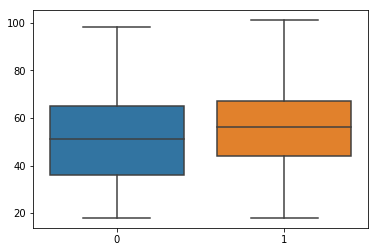

In [161]:
#boxplot: compare customer age
groups = [offered_profile_group1['age'],offered_profile_group2['age']]
sns.boxplot(data=groups)

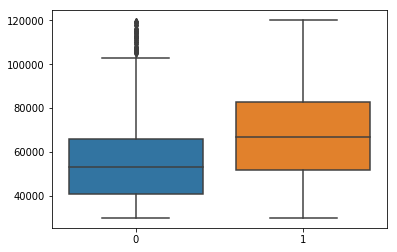

In [162]:
# compare customer income 
sns.boxplot(data = [offered_profile_group1['income'],offered_profile_group2['income']])

In [405]:
#filter income > 67000
offered_profile = offered_profile[offered_profile['income']>67000]

In [406]:
# transfer completion ratio by the following rule: 
# if compeltion ratio > 1 then completion = 1 else 0 
offered_profile['completion_ratio']=offered_profile['completion_ratio'].apply(lambda x:1 if x>0 else 0)
offered_profile.head()

,age,became_member_on,gender,person,income,transaction_ratio,view_ratio,completion_ratio
1,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0.388889,1.000000,1
2,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0,0.250000,0.750000,1
7,62,20160211,F,31dda685af34476cad5bc968bdb01c53,71000.0,0.347826,0.833333,1
11,40,20160504,F,440cf1fd7580490c971d8c651ed962af,71000.0,0.533333,0.800000,1
12,40,20160504,F,440cf1fd7580490c971d8c651ed962af,71000.0,0.533333,0.800000,1


In [407]:
# create dummy variables for categorical variable 
dummy = pd.get_dummies(offered_profile['gender'])
# add dummy variables to the dataset 
data_buy= pd.concat([offered_profile,dummy],axis=1)
data_buy= data_buy.drop('gender',axis=1)

In [410]:
# split dataset into x and y 
x = data_buy.drop(['completion_ratio','person'],axis=1)
y=data_buy['completion_ratio']

# split x, y into traiing and testing datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [416]:
# fit random forest classifier to the training data
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
rf.score(x_test,y_test)

0.9168831168831169

In [412]:
# use grid search to search the optimal params for rf 
params={
    "n_estimators": np.arange (2,10), 
    "max_depth": np.arange(3,10)
}
cv = GridSearchCV (estimator=RandomForestClassifier(), param_grid=params)
cv.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [425]:
# fit random forest classifier with optimal params to the training data
rf = RandomForestClassifier(n_estimators=9,max_depth=7)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
rf.score(x_test,y_test)

0.934025974025974

In [413]:
# print best score for rf
print(cv.best_score_)

0.93184855233853


In [419]:
# print optimal params for rf 
print(cv.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [426]:
# 5-fold cross-validation
print(cross_val_score(rf,x_train,y_train, cv=5))

[0.92213571 0.93770857 0.9298441  0.93756968 0.92976589]


In [427]:
# classification report for random forest classification
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.39      0.53       188
          1       0.94      0.99      0.96      1737

avg / total       0.93      0.93      0.92      1925



In [417]:
# logistic regression 
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
(y_pred==y_test).mean()

0.9023376623376623

In [418]:
# K-nearst neighbor 
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
(y_pred==y_test).mean()

0.8851948051948052

In [422]:
# use grid search to find the optimal params for knn
params={
    "n_neighbors": np.arange(2,50)
}
cv = GridSearchCV (estimator=knn, param_grid=params)
cv.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [423]:
#print best score for rf
print(cv.best_score_)

0.9017817371937639


In [424]:
# print optimal params for rf 
print(cv.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=35, p=2,
           weights='uniform')


In [276]:
# merge offered_profile_group 2 and transcript to better understand how purchasing behaviors
# associated with offer type 
data = pd.merge(offered_profile_group2,transcript,on='person')
data_merged = pd.merge(data,portfolio,on='id')

In [445]:
data_merged.groupby(["reward","event"])['id'].count()

reward  event          
0       offer received     10308
        offer viewed        7482
2       offer completed     8891
        offer received     11047
        offer viewed        8617
3       offer completed     4886
        offer received      5741
        offer viewed        5523
5       offer completed    11609
        offer received     16323
        offer viewed       10445
10      offer completed     6955
        offer received     10748
        offer viewed        9871
Name: id, dtype: int64

In [443]:
data_merged.groupby(["offer_type","event","gender_x"])['event'].count()

offer_type     event            gender_x
bogo           offer completed  F            7469
                                M            7499
                                O             245
               offer received   F            9741
                                M           11715
                                O             311
               offer viewed     F            8183
                                M            9865
                                O             283
discount       offer completed  F            7935
                                M            8937
                                O             256
               offer received   F            9743
                                M           12030
                                O             319
               offer viewed     F            7119
                                M            8742
                                O             264
informational  offer received   F            4709
         